In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import concurrent.futures
from tqdm import tqdm
plt.rcParams['figure.dpi'] = 200
from utils2 import *

In [2]:
lamda = 0.2
min_distance = 0.1 
t = 50
nbSources = 5
SNRs = [-15, -10, -5, 0, 5, 10, 15, 20]
mc = 500

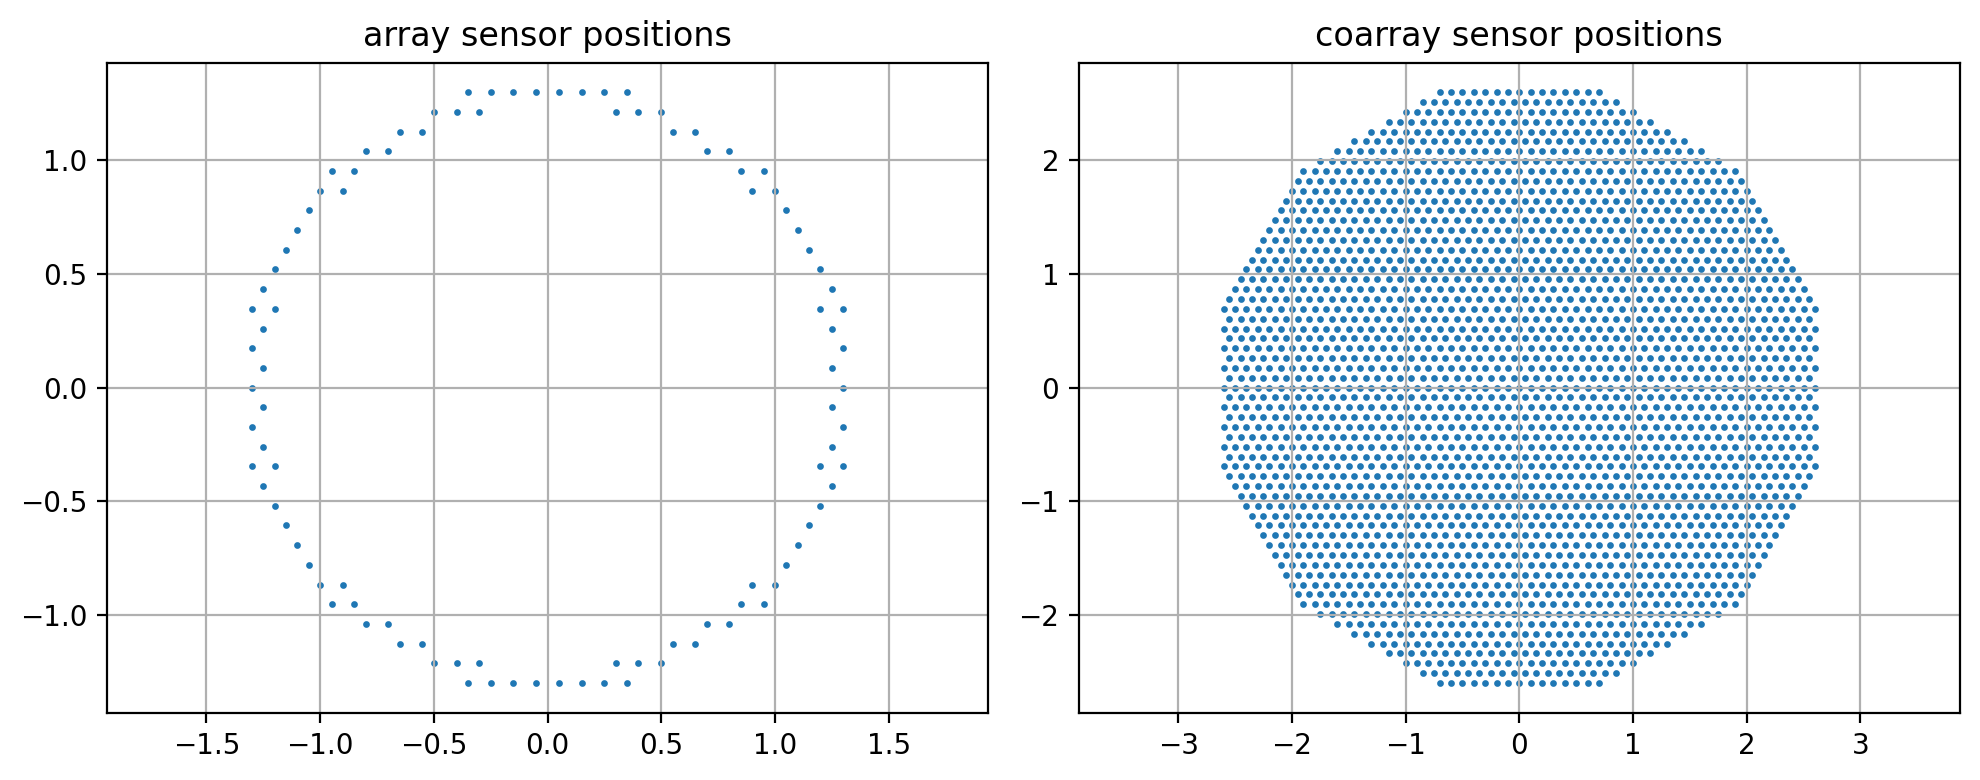

In [3]:
HA = HexagonalArray(lamda=lamda, min_distance=min_distance)
HA.build_coarray()
HA.build_array_manifold()
HA.plot()

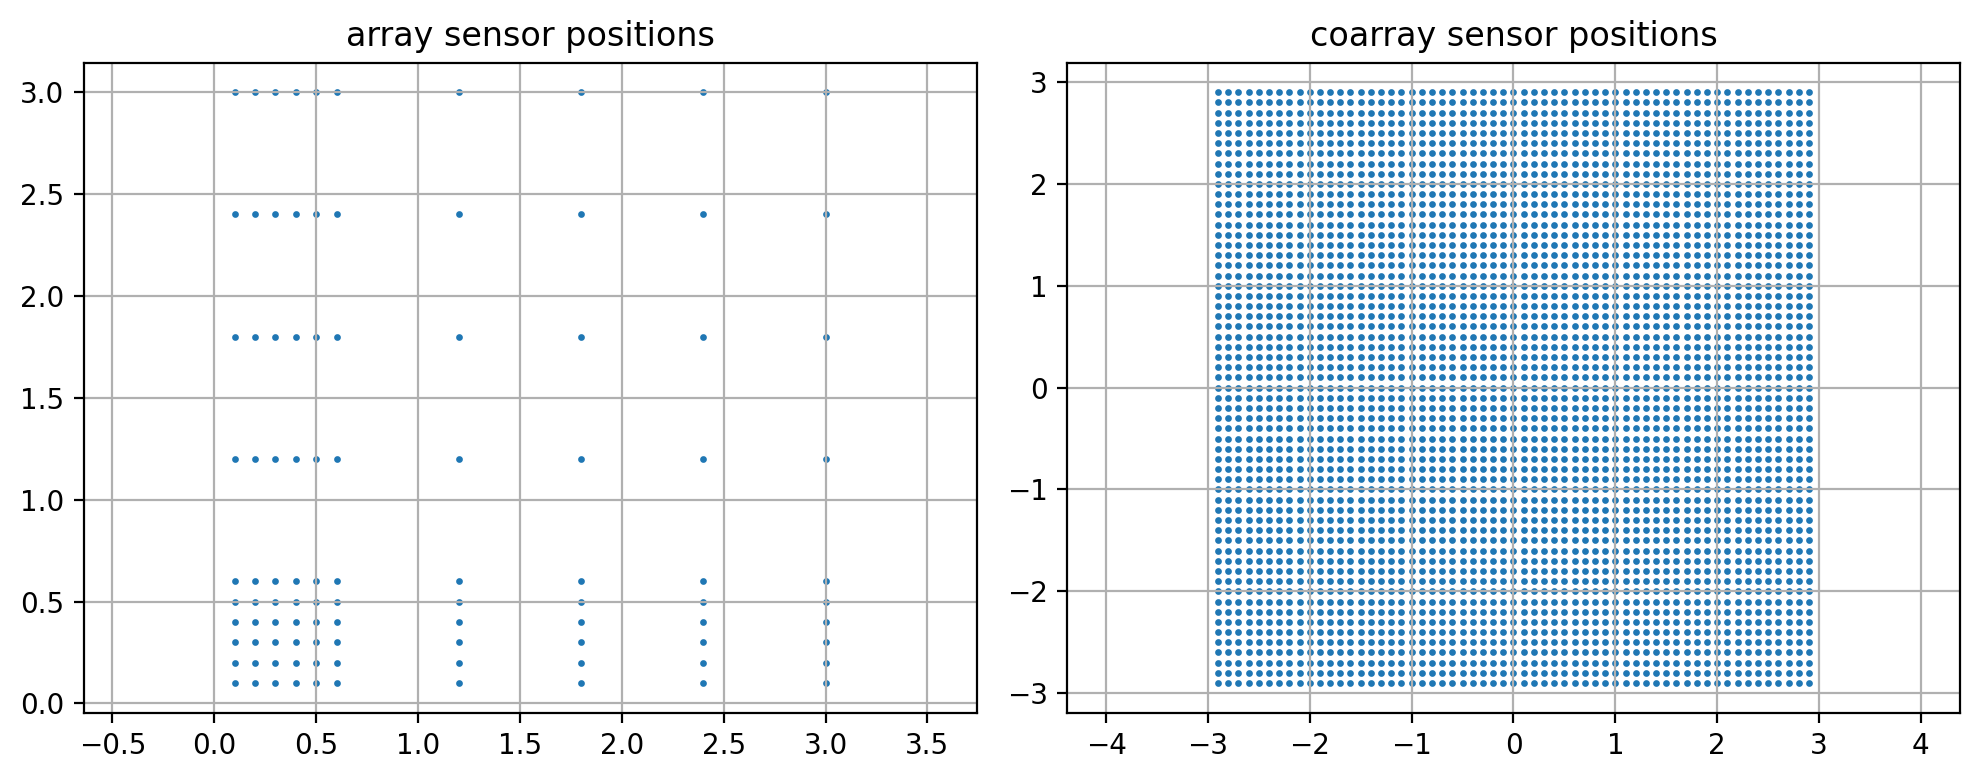

In [4]:
NA = NestedArray2D(lamda=lamda, min_distance=min_distance, levels_horizontal=[5, 5], levels_vertical=[5, 5])
NA.build_coarray()
NA.build_array_manifold()
NA.plot()

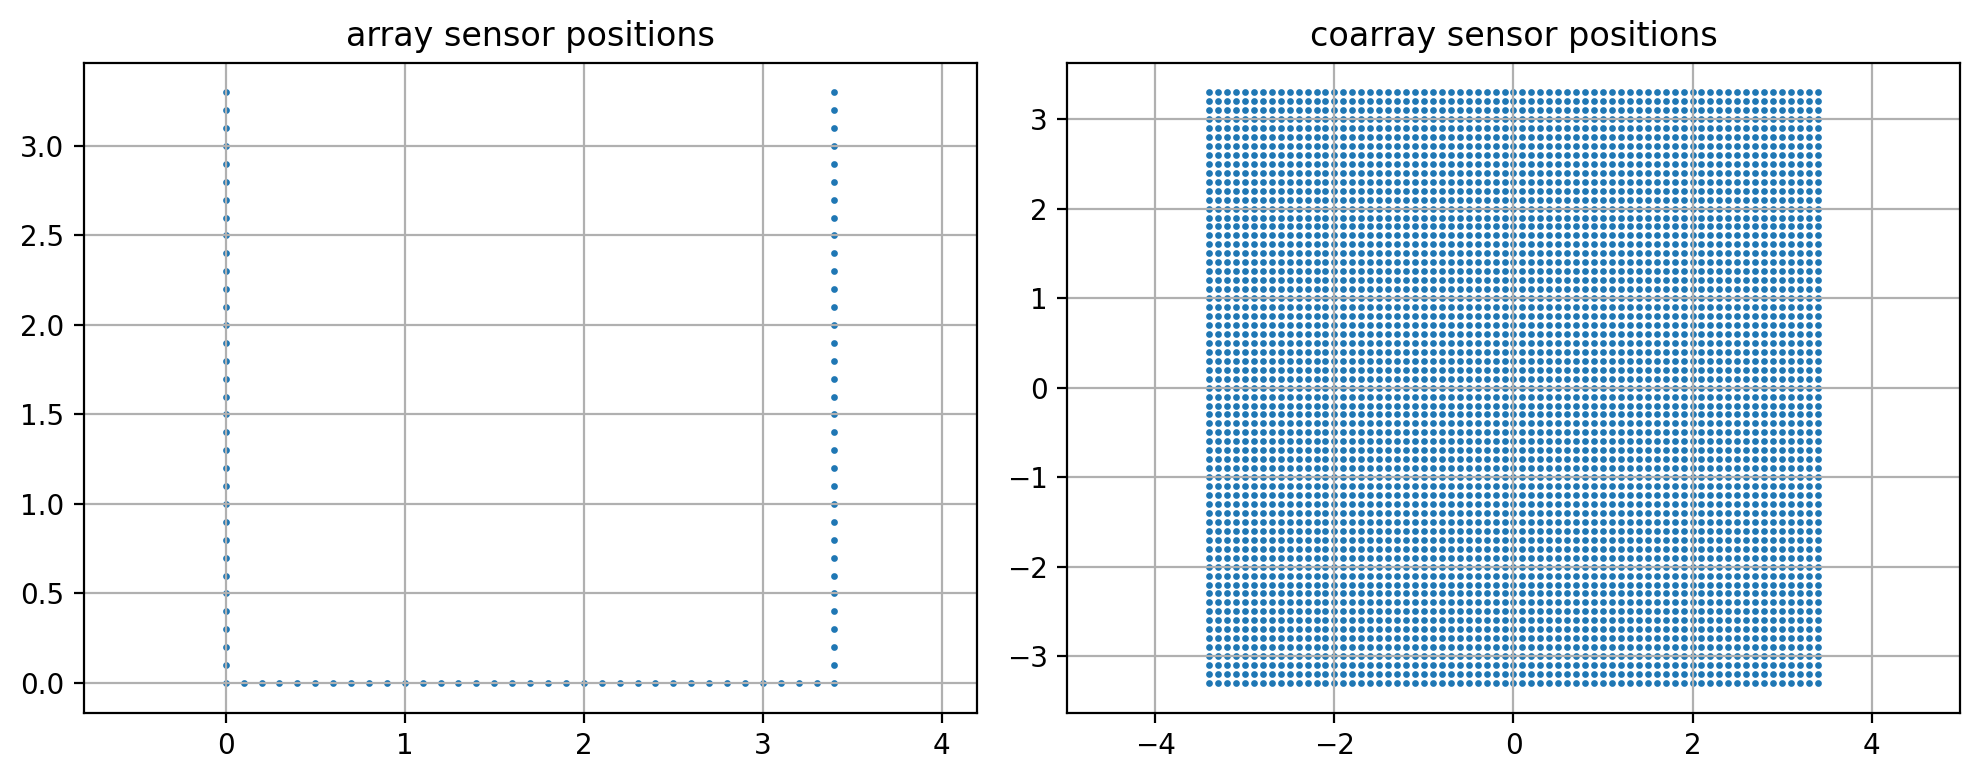

In [5]:
OB = OpenBoxArray(lamda=lamda, min_distance=min_distance, size_horizontal=35, size_vertical=34)
OB.build_coarray()
OB.build_array_manifold()
OB.plot()

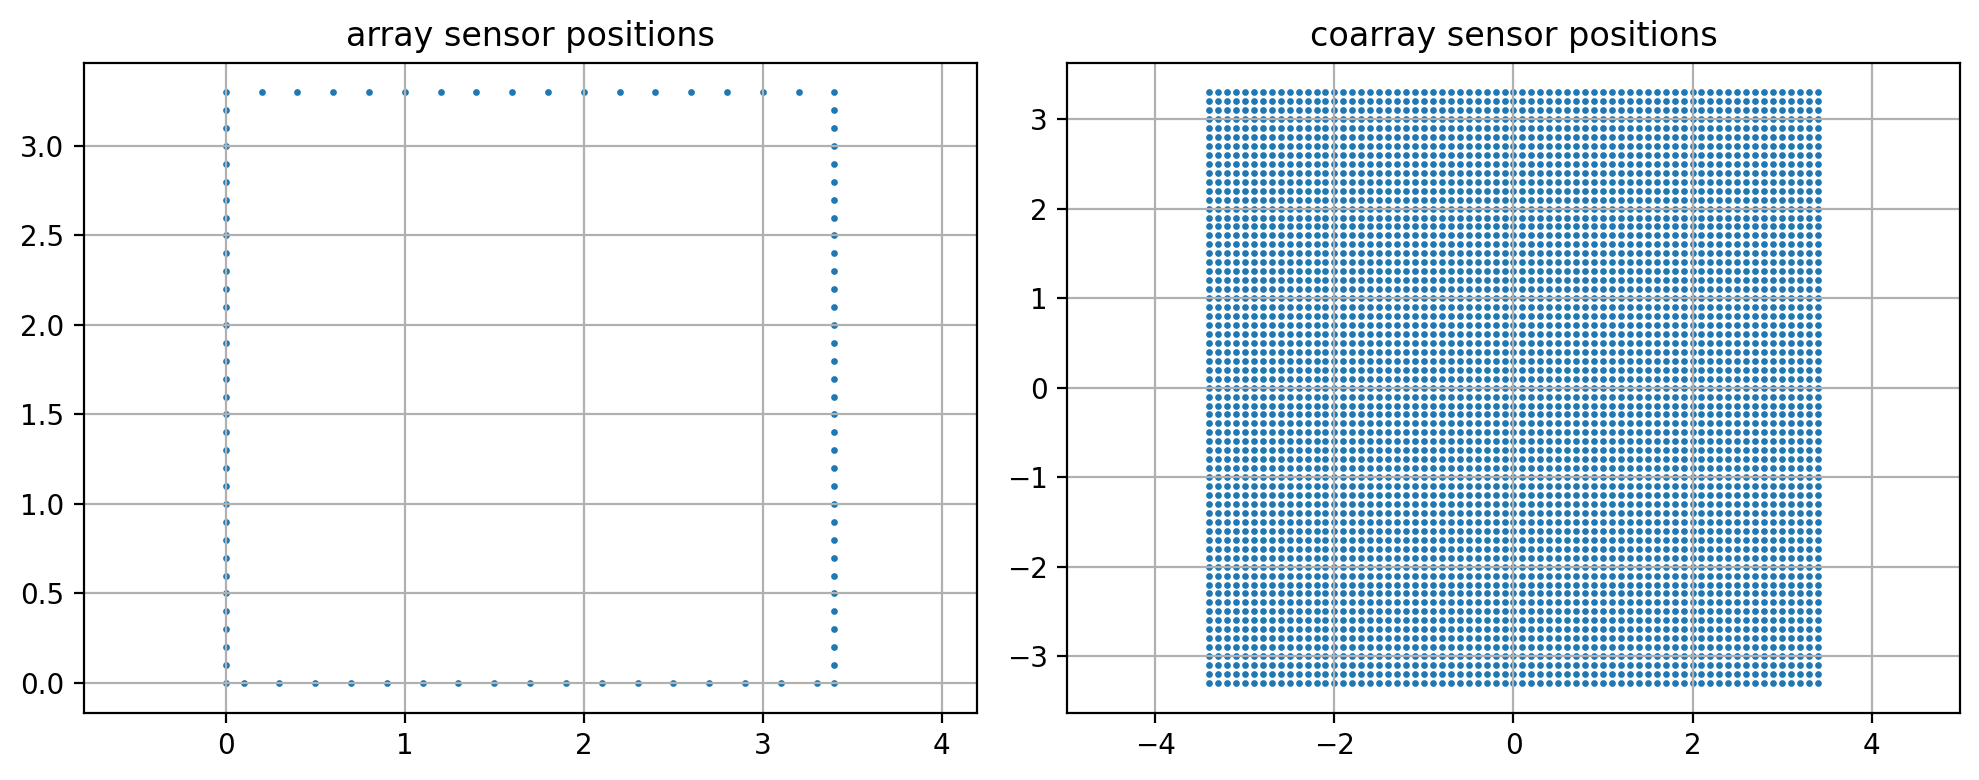

In [6]:
HOB = HalfOpenBoxArray(lamda=lamda, min_distance=min_distance, size_horizontal=35, size_vertical=34)
HOB.build_coarray()
HOB.build_array_manifold()
HOB.plot()

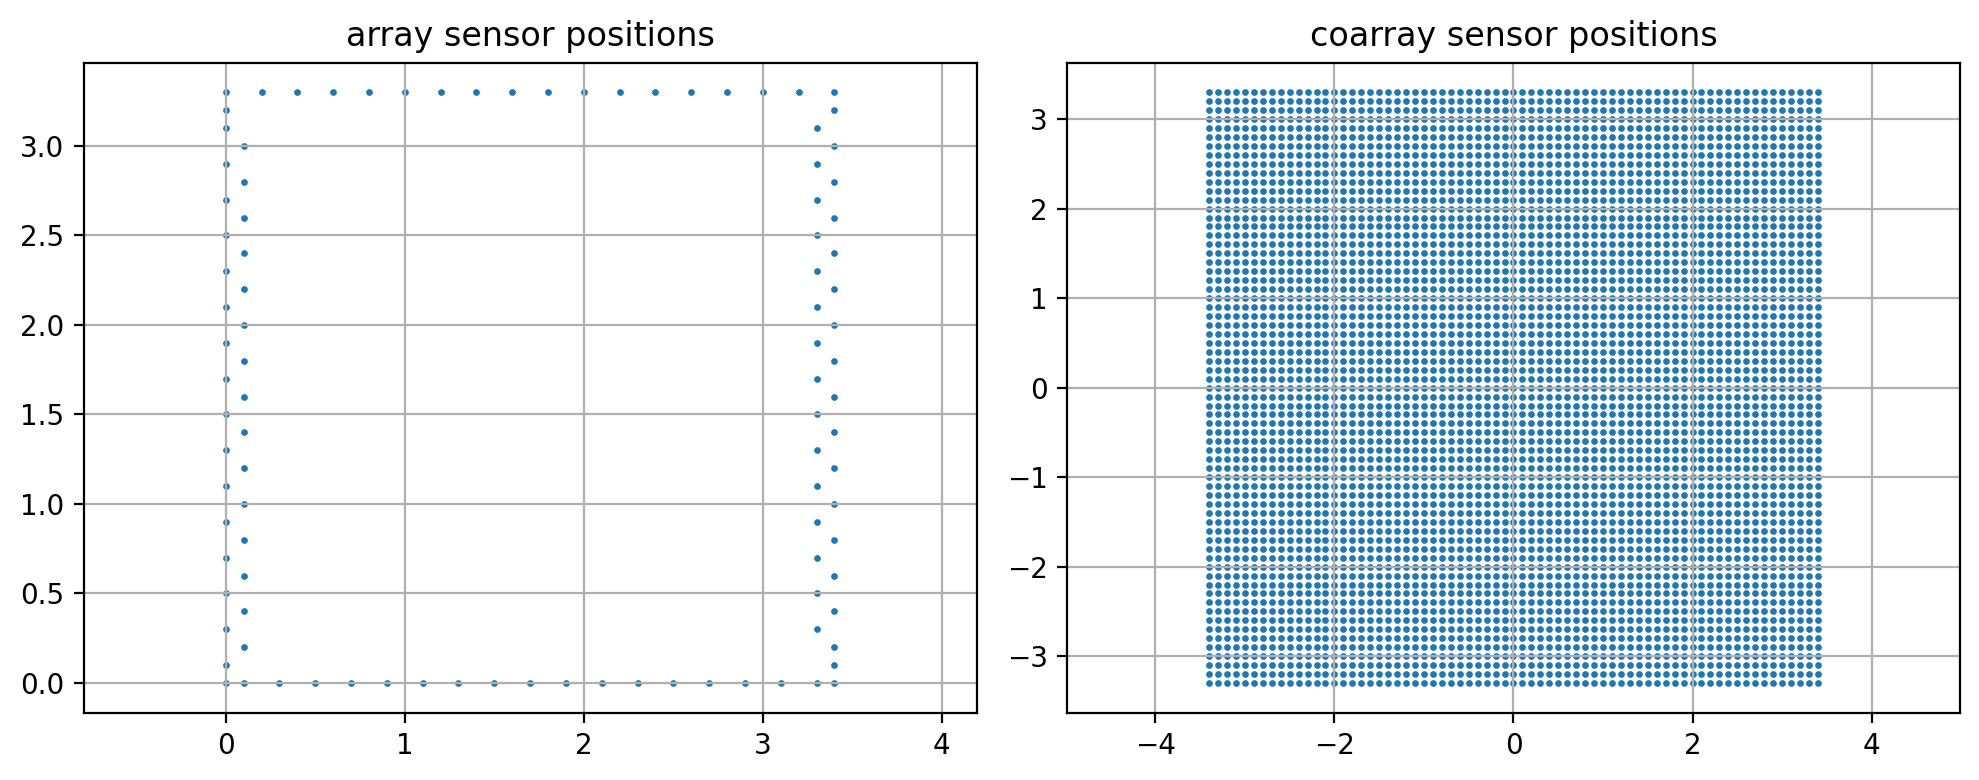

In [7]:
HOB2 = HalfOpenBoxArray2(lamda=lamda, min_distance=min_distance, size_horizontal=35, size_vertical=34)
HOB2.build_coarray()
HOB2.build_array_manifold()
HOB2.plot()

In [8]:
# def run_trial(snr):
#     rmspe_ha_fft, rmspe_ha_music, rmspe_na_fft, rmspe_na_music, rmspe_ob_fft, rmspe_ob_music = [], [], [], [], [], []
#     for _ in tqdm(range(mc)):
#         phi_true = generate_angles(nbSources, 0, np.pi)
#         theta_true = generate_angles(nbSources, 0, np.pi/2)
#         S = (np.random.randn(nbSources, t) + 1j * np.random.randn(nbSources, t)) / sqrt(2)

#         noise_ha = (np.random.randn(HA.nbSensors, t) + 1j * np.random.randn(HA.nbSensors, t)) / sqrt(2) * sqrt(nbSources) * 10 ** (-snr/20)
#         X_ha = HA.get_steering_vector(phi_true, theta_true) @ S + noise_ha
#         estimated_phi_ha_fft, estimated_theta_ha_fft = HA.estimate_doa_fft(X_ha, nbSources)
#         rmspe_ha_fft.append(rmspe.calculate(estimated_phi_ha_fft, estimated_theta_ha_fft, phi_true, theta_true))
#         estimated_phi_ha_music, estimated_theta_ha_music = HA.estimate_doa_music(X_ha, nbSources)
#         rmspe_ha_music.append(rmspe.calculate(estimated_phi_ha_music, estimated_theta_ha_music, phi_true, theta_true))

#         noise_na = (np.random.randn(NA.nbSensors, t) + 1j * np.random.randn(NA.nbSensors, t)) / sqrt(2) * sqrt(nbSources) * 10 ** (-snr/20)
#         X_na = NA.get_steering_vector(phi_true, theta_true) @ S + noise_na
#         estimated_phi_na_fft, estimated_theta_na_fft = NA.estimate_doa_fft(X_na, nbSources)
#         rmspe_na_fft.append(rmspe.calculate(estimated_phi_na_fft, estimated_theta_na_fft, phi_true, theta_true))
#         estimated_phi_na_music, estimated_theta_na_music = NA.estimate_doa_music(X_na, nbSources)
#         rmspe_na_music.append(rmspe.calculate(estimated_phi_na_music, estimated_theta_na_music, phi_true, theta_true))

#         noise_ob = (np.random.randn(OB.nbSensors, t) + 1j * np.random.randn(OB.nbSensors, t)) / sqrt(2) * sqrt(nbSources) * 10 ** (-snr/20)
#         X_ob = OB.get_steering_vector(phi_true, theta_true) @ S + noise_ob
#         estimated_phi_ob_fft, estimated_theta_ob_fft = OB.estimate_doa_fft(X_ob, nbSources)
#         rmspe_ob_fft.append(rmspe.calculate(estimated_phi_ob_fft, estimated_theta_ob_fft, phi_true, theta_true))
#         estimated_phi_ob_music, estimated_theta_ob_music = OB.estimate_doa_music(X_ob, nbSources)
#         rmspe_ob_music.append(rmspe.calculate(estimated_phi_ob_music, estimated_theta_ob_music, phi_true, theta_true))
#     return (
#         sum(rmspe_ha_fft) / mc,
#         sum(rmspe_ha_music) / mc,
#         sum(rmspe_na_fft) / mc,
#         sum(rmspe_na_music) / mc,
#         sum(rmspe_ob_fft) / mc,
#         sum(rmspe_ob_music) / mc,
#     )

# methods = ["Hexagonal Array - FFT", "Hexagonal Array - MUSIC",
#            "Nested Array - FFT", "Nested Array - MUSIC",
#            "Open Box Array - FFT", "Open Box Array - MUSIC"]
# values = {key: [] for key in methods}
# rmspe = RMSPE(nbSources)

# with concurrent.futures.ProcessPoolExecutor() as executor:
#     results = list(executor.map(run_trial, SNRs))

# for idx, snr in enumerate(SNRs):
#     ha_fft, ha_music, na_fft, na_music, ob_fft, ob_music = results[idx]
#     values['Hexagonal Array - FFT'].append(ha_fft)
#     values['Nested Array - FFT'].append(na_fft)
#     values['Open Box Array - FFT'].append(ob_fft)
#     values['Hexagonal Array - MUSIC'].append(ha_music)
#     values['Nested Array - MUSIC'].append(na_music)
#     values['Open Box Array - MUSIC'].append(ob_music)

# for method in methods:
#     plt.plot(SNRs, values[method], marker='o', label=method)

# plt.title("Performance Comparison Across SNR Levels", fontsize=14)
# plt.xlabel("SNR (dB)", fontsize=12)
# plt.ylabel("RMSPE (rad)", fontsize=12)
# plt.yscale('log')
# plt.xticks(SNRs)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.legend(title="Methods")
# plt.tight_layout()
# plt.show()